In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('../datasets/clean_dataset.csv')

RANDOM_SEED=42

In [114]:
df.head()

,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,age,gender,bad_flag,diff_loans,First loan year,Rep loan year,First loan month,Rep loan month
0,3.0,6,6,0,0,10,0,0,0,10.0,578.964683,21.0,0,0,328,2015,2016,11,10
1,0.0,6,6,0,0,6,0,0,0,5.0,578.964683,20.0,0,0,180,2015,2016,9,3
2,2.0,1,6,0,0,0,5,0,0,5.0,578.964683,19.0,0,0,314,2015,2016,12,10
3,1.0,6,14,0,0,4,0,0,0,6.0,578.964683,21.0,0,0,365,2015,2016,6,6
4,0.0,5,22,0,3,0,0,0,0,3.0,578.964683,33.0,0,0,120,2015,2015,8,12


### Algorithm selection

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [116]:
features = ['close_loans_cnt','federal_district_nm','TraderKey','payment_type_0','payment_type_1','payment_type_2','payment_type_3','payment_type_4','past_billings_cnt','score_1','age','gender','diff_loans']
target = 'bad_flag'

In [117]:
X_train,X_test,y_train,y_test = train_test_split(df[features],df[target],test_size=0.2,stratify=df[target],random_state=RANDOM_SEED)

In [118]:
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100,random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100,random_state=RANDOM_SEED)
]

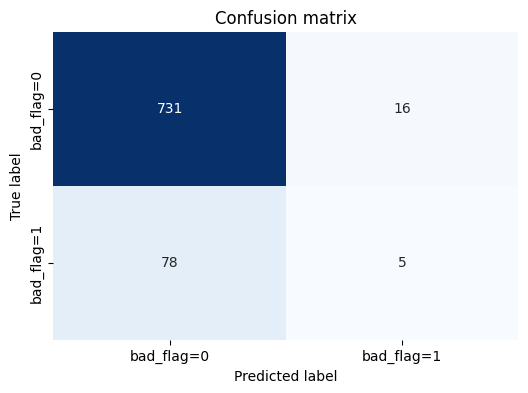

KNeighborsClassifier  f1 score: 0.09615384615384615


d:\Documentos\Proyectos\Data science escritorio\Data science\StrataScratch\CLASIFICACION\Flagging Loans - Mokka\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


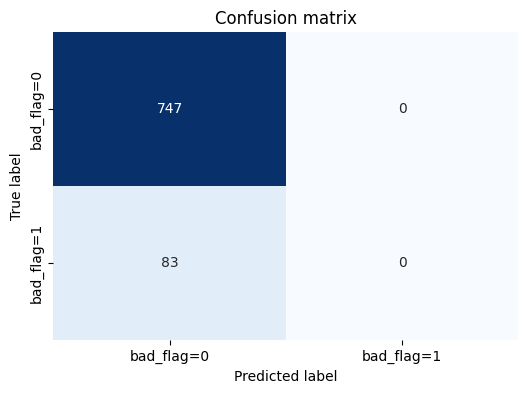

LogisticRegression  f1 score: 0.0


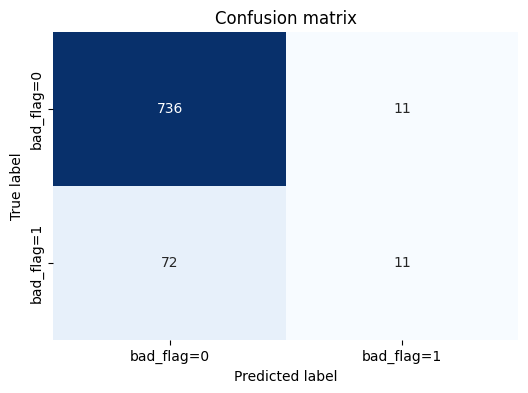

BaggingClassifier  f1 score: 0.20952380952380956


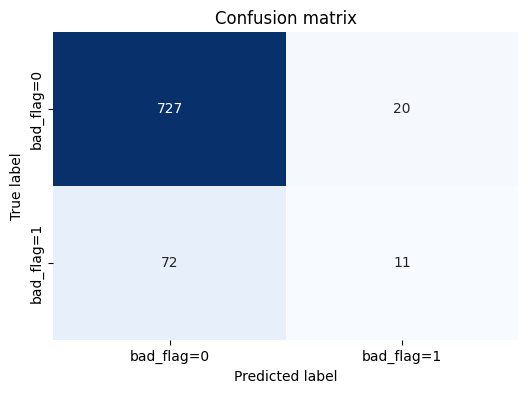

GaussianNB  f1 score: 0.1929824561403509


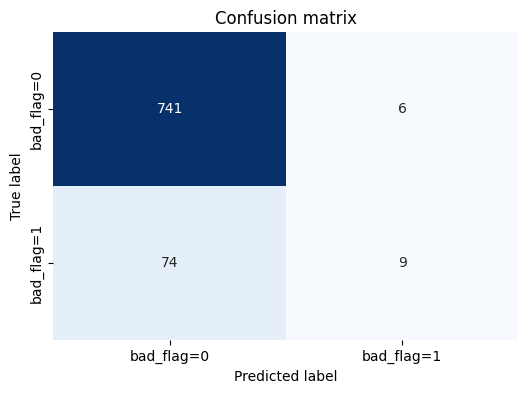

RandomForestClassifier  f1 score: 0.18367346938775508


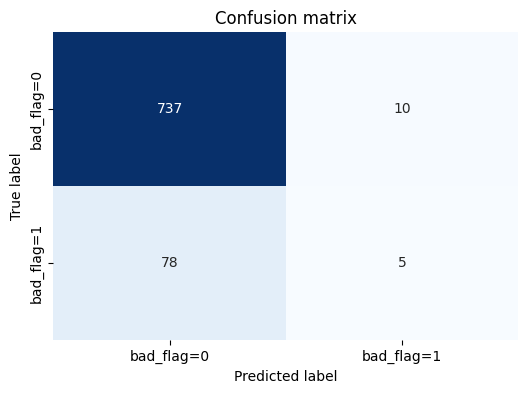

ExtraTreesClassifier  f1 score: 0.10204081632653061


In [119]:
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Definir etiquetas de clase
    classes=["bad_flag=0", "bad_flag=1"]

    # Crear mapa de calor de la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    print(classifier.__class__.__name__, " f1 score:", f1)

As can be seen, the f1 metric is quite bad for all algorithms. This may be due to the fact that the class is unbalanced. Four methods are proposed to handle this situation:

- Over sampling the minority class
- Under sampling the mayority class
- Class weights (more on the minority class)
- Generate new data (SMOTE)

The experiments will be performed on the notebooks Exp_1, Exp_2